## Multiple Linear Regression

Bu projede TV, Radyo ve Gazete ilanlarına göre satış rakamları var.
Sales Sütunu hedef   yani y=df['Sales'].
TV, radyo ve gazeteye ayrı ayrı ne kadar yatırım yaparsam satış rakamlarım ne kadar artar sorusuna cevap arayacağız 
ve Hangi reklam yönteminin daha başarılı olduğunu bulacağız 
Test olarak ayırdığımız veri ile tahmin ettiğimiz veriyi aynı grafikte line chart ile görselleştireceğiz

In [3]:
# kütüphaneleri import etmekle başlıyoruz
import numpy as np
import pandas as pd


In [5]:
df=pd.read_csv('advertising.csv')

In [6]:
#EDA-Exploratory Data Analysis
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [8]:
df.shape

(200, 4)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [10]:
import seaborn as sns

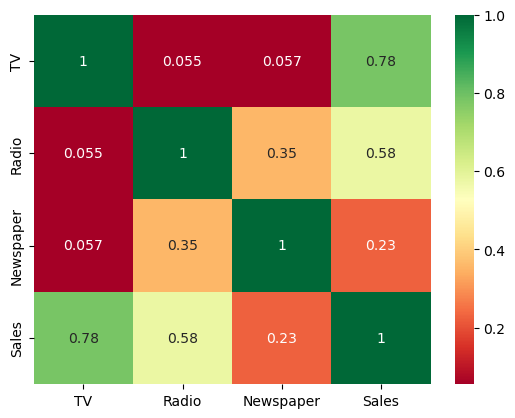

In [31]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='RdYlGn' );

Corelasyon tablosundan görüyoruz ki tv ile sales arasında pozitif yüksek bir ilişki var 
ve arkasından radio ve onun da arkasından  newspaper geliyor

In [12]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [14]:
#verimizde  düzeltme yapılması gereken bir durum olmadığı için feature engineeringe gerek kalmıyor

## Modelleme-modelling

In [19]:
x=df.loc[:,['TV','Radio','Newspaper']]
y=df.loc[:,['Sales']]

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns


In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [22]:
lr=LinearRegression()

In [23]:
lr.fit(x_train,y_train)

LinearRegression()

In [24]:
tahmin=lr.predict(x_test)

In [25]:
tahmin

array([[16.4080242 ],
       [20.88988209],
       [21.55384318],
       [10.60850256],
       [22.11237326],
       [13.10559172],
       [21.05719192],
       [ 7.46101034],
       [13.60634581],
       [15.15506967],
       [ 9.04831992],
       [ 6.65328312],
       [14.34554487],
       [ 8.90349333],
       [ 9.68959028],
       [12.16494386],
       [ 8.73628397],
       [16.26507258],
       [10.27759582],
       [18.83109103],
       [19.56036653],
       [13.25103464],
       [12.33620695],
       [21.30695132],
       [ 7.82740305],
       [ 5.80957448],
       [20.75753231],
       [11.98138077],
       [ 9.18349576],
       [ 8.5066991 ],
       [12.46646769],
       [10.00337695],
       [21.3876709 ],
       [12.24966368],
       [18.26661538],
       [20.13766267],
       [14.05514005],
       [20.85411186],
       [11.0174441 ],
       [ 4.56899622]])

In [26]:
r2_score(y_test,tahmin)

0.899438024100912

In [27]:
mean_squared_error(y_test,tahmin)**.5

1.7815996615334502

In [35]:
from sklearn.ensemble import GradientBoostingRegressor

In [36]:
 GBR=GradientBoostingRegressor()

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [38]:
GBR.fit(x_train,y_train)

GradientBoostingRegressor()

In [39]:
tahmin=GBR.predict(x_test)

In [40]:
r2_score(y_test,tahmin)

0.9836443833464613

In [ ]:
#En başarılı yöntem budur.

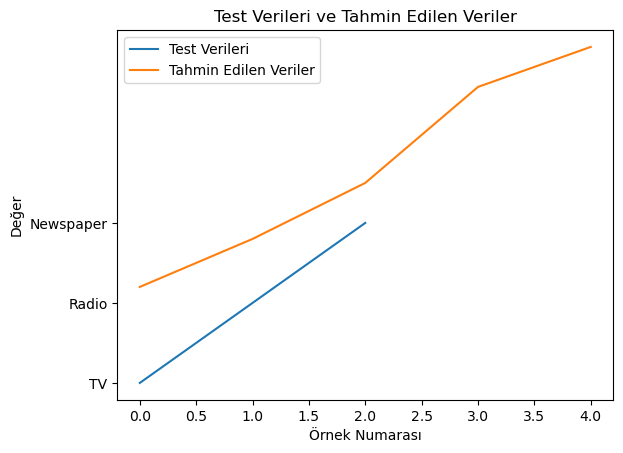

In [41]:
import matplotlib.pyplot as plt

# Test verileri
x = ['TV','Radio','Newspaper']
# Tahmin edilen veriler
y= [1.2, 1.8, 2.5, 3.7, 4.2]

# Grafik çizimi
plt.plot(x, label='Test Verileri')
plt.plot(y, label='Tahmin Edilen Veriler')

# Eksen etiketleri ve başlık
plt.xlabel('Örnek Numarası')
plt.ylabel('Değer')
plt.title('Test Verileri ve Tahmin Edilen Veriler')

# Lejant (açıklama) gösterimi
plt.legend()

# Grafik gösterimi
plt.show()